# Supervised Classification With KNearestNeighbors Using Mammography Data


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_validation import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Instantiate Models/Estimators
knn = KNeighborsClassifier(n_neighbors = 9)
accuracy = metrics.accuracy_score

/Users/kerrylam/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data", header = None) #column name correct
data.columns = ["BI-RADS Assessment", "Age","Shape","Margin","Density","Severity"]
data.shape # Shape of DataFrame (observations, features)
# data.head()
print (data.shape)

(961, 6)


In [3]:
# Removing Data With Missing Values
data = data.replace("?", np.NaN)
data.dropna(inplace = True)
data.head()

,BI-RADS Assessment,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
8,5,57,1,5,3,1
10,5,76,1,4,3,1


In [4]:
features = data.ix[:,1:6] # Counts last 5 features
features.shape
x_data = features 
y_data = data["BI-RADS Assessment"] 
print (x_data.shape) 
print (y_data.shape) 

(830, 5)
(830,)


In [5]:
x_train_data, x_test_data, y_train_data, y_test_data = \
train_test_split(x_data, y_data, test_size = 0.30)

In [6]:
a = ["Observations, Features for Training Set:"]
b = ["Response vector for Training Set:"]
c = ["Observations, Features for Testing Set:"]
d = ["Response vector for Testing Set:"]

print (a, x_train_data.shape)
print (b, y_train_data.shape)
print (c, x_test_data.shape)
print (d, y_test_data.shape)

['Observations, Features for Training Set:'] (581, 5)
['Response vector for Training Set:'] (581,)
['Observations, Features for Testing Set:'] (249, 5)
['Response vector for Testing Set:'] (249,)


In [7]:
# Fits Model With Data For Training
knn.fit(x_train_data, y_train_data) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [8]:
response_prediction = knn.predict(x_test_data)

In [9]:
print (accuracy(y_test_data, response_prediction)*100, "% Accuracy")

75.1004016064 % Accuracy


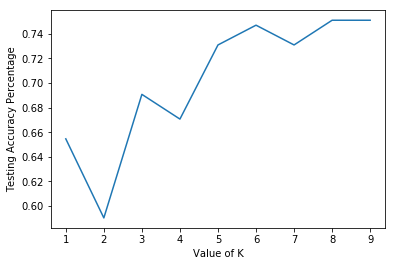

In [10]:
# Find k-value That Produces Highest Accuracy For The Model
k_range = range(1,10)
accuracy_scores = [] 
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train_data, y_train_data)
    response_prediction = knn.predict(x_test_data)
    accuracy_scores.append(accuracy(y_test_data, response_prediction))
    
plt.plot(k_range, accuracy_scores)
plt.xlabel("Value of K")
plt.ylabel("Testing Accuracy Percentage")
plt.show()